In [87]:
from sympy import *
from sympy.codegen.ast import CodeBlock, Assignment
import numpy as np
import matplotlib.pyplot as plt
import math, time

%matplotlib widget

In [88]:
#constant lengths
# OA = 15.435
# OD = 19.869
# AB = 15.00
# AC = 28.049
# CD = 18.351
# DF = 43.91
# BE = 26.302
# EF = 9.012
# EG = 78.511
# ang_BAC = rad(13.27) 
# ang_FDC = rad(17.287)
# ang_GEF = rad(1.841)
OA,OD,AB,AC,CD,DF,BE,EF,EG,phi_BAC,phi_CDF,phi_GEF = symbols('OA,OD,AB,AC,CD,DF,BE,EF,EG,phi_BAC,phi_CDF,phi_GEF')

#params
# thetaA = rad(126.737)
# thetaD = rad(-68.581)
theta_A,theta_D = symbols('theta_A,theta_D')

#common funcs
def mag(x, y):
    return sqrt(x*x + y*y)

def length(_A, _B):
    _C = _A - _B
    return sqrt(_C[0]*_C[0] + _C[1]*_C[1])

def ang_of(_A, _B): #global angle of line segment with A as "origin"
    return atan2(_B[1] - _A[1], _B[0] - _A[0])

def at_angle(_theta):
    return Matrix([cos(_theta), sin(_theta)])

In [89]:
A = OA * Matrix([cos(theta_A), sin(theta_A)])
D = OD * Matrix([cos(theta_D), sin(theta_D)])
AD = length(A,D)
ang_DAC = acos((AC**2 + AD**2 - CD**2) / (2*AC*AD))

C = A + AC*at_angle(ang_of(A,D) - ang_DAC)
B = A + AB*at_angle(ang_of(A,C) - phi_BAC)
F = D + DF*at_angle(ang_of(D,C) - phi_CDF)
F

Matrix([
[ DF*cos(phi_CDF - atan2(-AC*sin(acos((AC**2 - CD**2 + (OA*sin(theta_A) - OD*sin(theta_D))**2 + (OA*cos(theta_A) - OD*cos(theta_D))**2)/(2*AC*sqrt((OA*sin(theta_A) - OD*sin(theta_D))**2 + (OA*cos(theta_A) - OD*cos(theta_D))**2))) - atan2(-OA*sin(theta_A) + OD*sin(theta_D), -OA*cos(theta_A) + OD*cos(theta_D))) + OA*sin(theta_A) - OD*sin(theta_D), AC*cos(acos((AC**2 - CD**2 + (OA*sin(theta_A) - OD*sin(theta_D))**2 + (OA*cos(theta_A) - OD*cos(theta_D))**2)/(2*AC*sqrt((OA*sin(theta_A) - OD*sin(theta_D))**2 + (OA*cos(theta_A) - OD*cos(theta_D))**2))) - atan2(-OA*sin(theta_A) + OD*sin(theta_D), -OA*cos(theta_A) + OD*cos(theta_D))) + OA*cos(theta_A) - OD*cos(theta_D))) + OD*cos(theta_D)],
[-DF*sin(phi_CDF - atan2(-AC*sin(acos((AC**2 - CD**2 + (OA*sin(theta_A) - OD*sin(theta_D))**2 + (OA*cos(theta_A) - OD*cos(theta_D))**2)/(2*AC*sqrt((OA*sin(theta_A) - OD*sin(theta_D))**2 + (OA*cos(theta_A) - OD*cos(theta_D))**2))) - atan2(-OA*sin(theta_A) + OD*sin(theta_D), -OA*cos(theta_A) + OD*cos(

In [90]:
BF = length(B,F)
ang_EBF = acos((BE**2 + BF**2 - EF**2) / (2*BE*BF))
E = B + BE*at_angle(ang_of(B,F) - ang_EBF)
G = E + EG*at_angle(ang_of(E,F) - phi_GEF)

In [91]:
dG_A = G.diff(theta_A)

In [92]:
count_ops(G)

9472

In [93]:
gx, gy = symbols('gx, gy')
dG_Ax = symbols('dG_Ax')

code = CodeBlock(
    Assignment(gx, G[0]),
    Assignment(gy, G[1]),    
    Assignment(dG_Ax, dG_A[0]),
).cse()
print(f"# {count_ops(code)} operations")
print(pycode(code))

# 272 operations
x0 = math.cos(theta_A)
x1 = OA*x0
x2 = math.sin(theta_A)
x3 = OA*x2
x4 = OD*math.sin(theta_D)
x5 = x3 - x4
x6 = -x5
x7 = -OD*math.cos(theta_D) + x1
x8 = -x7
x9 = AC**2
x10 = x5**2 + x7**2
x11 = -CD**2 + x10 + x9
x12 = 1/AC
x13 = (1/2)*x12/math.sqrt(x10)
x14 = math.acos(x11*x13) - math.atan2(x6, x8)
x15 = math.sin(x14)
x16 = AC*x15
x17 = math.cos(x14)
x18 = AC*x17
x19 = phi_BAC - math.atan2(-x16, x18)
x20 = math.cos(x19)
x21 = AB*x20
x22 = AB*math.sin(x19)
x23 = -x3
x24 = x23 + x4
x25 = x16 + x24
x26 = -x25
x27 = x18 + x7
x28 = phi_CDF - math.atan2(x26, x27)
x29 = math.sin(x28)
x30 = DF*x29
x31 = x22 + x24 - x30
x32 = math.cos(x28)
x33 = -DF*x32 + x21 + x7
x34 = -x33
x35 = BE**2
x36 = -x31
x37 = x33**2 + x36**2
x38 = -EF**2 + x35 + x37
x39 = 1/BE
x40 = (1/2)*x39/math.sqrt(x37)
x41 = math.acos(x38*x40) - math.atan2(x31, x34)
x42 = BE*math.cos(x41)
x43 = BE*math.sin(x41)
x44 = x31 + x43
x45 = -x33 - x42
x46 = phi_GEF - math.atan2(x44, x45)
x47 = EG*math.sin(x46)
x48 = 1/(

In [94]:
gx, gy = symbols('gx, gy')

code = CodeBlock(
    Assignment(gx, G[0]),
    Assignment(gy, G[1]),
).cse()

print(f"# {count_ops(code)} operations")

print(pycode(code))

# 113 operations
x0 = OA*math.cos(theta_A)
x1 = OA*math.sin(theta_A)
x2 = OD*math.sin(theta_D)
x3 = x1 - x2
x4 = -OD*math.cos(theta_D) + x0
x5 = x3**2 + x4**2
x6 = math.acos((1/2)*(AC**2 - CD**2 + x5)/(AC*math.sqrt(x5))) - math.atan2(-x3, -x4)
x7 = AC*math.sin(x6)
x8 = AC*math.cos(x6)
x9 = phi_BAC - math.atan2(-x7, x8)
x10 = AB*math.cos(x9)
x11 = AB*math.sin(x9)
x12 = -x1
x13 = x12 + x2
x14 = phi_CDF - math.atan2(-x13 - x7, x4 + x8)
x15 = -DF*math.sin(x14) + x11 + x13
x16 = -DF*math.cos(x14) + x10 + x4
x17 = x15**2 + x16**2
x18 = math.acos((1/2)*(BE**2 - EF**2 + x17)/(BE*math.sqrt(x17))) - math.atan2(x15, -x16)
x19 = BE*math.cos(x18)
x20 = BE*math.sin(x18)
x21 = phi_GEF - math.atan2(x15 + x20, -x16 - x19)
gx = EG*math.cos(x21) + x0 + x10 + x19
gy = -EG*math.sin(x21) - x11 - x12 - x20


In [95]:
start_time = time.time()

OA_n = 15.435
OD_n = 19.869
AB_n = 15.00
AC_n = 28.049
CD_n = 18.351
DF_n = 43.91
BE_n = 26.302
EF_n = 9.012
EG_n = 78.511
phi_BAC_n = rad(13.27) 
phi_CDF_n = rad(17.287)
phi_GEF_n = rad(1.841)

theta_A_n = rad(126.737)
theta_D_n = rad(-68.581)


def fk(_theta_A_n, _theta_D_n):
    try:
        x0 = OA_n*math.cos(_theta_A_n)
        x1 = OA_n*math.sin(_theta_A_n)
        x2 = OD_n*math.sin(_theta_D_n)
        x3 = x1 - x2
        x4 = -OD_n*math.cos(_theta_D_n) + x0
        x5 = x3**2 + x4**2
        x6 = math.acos((1/2)*(AC_n**2 - CD_n**2 + x5)/(AC_n*math.sqrt(x5))) - math.atan2(-x3, -x4)
        x7 = AC_n*math.sin(x6)
        x8 = AC_n*math.cos(x6)
        x9 = phi_BAC_n - math.atan2(-x7, x8)
        x10 = AB_n*math.cos(x9)
        x11 = AB_n*math.sin(x9)
        x12 = -x1
        x13 = x12 + x2
        x14 = phi_CDF_n - math.atan2(-x13 - x7, x4 + x8)
        x15 = -DF_n*math.sin(x14) + x11 + x13
        x16 = -DF_n*math.cos(x14) + x10 + x4
        x17 = x15**2 + x16**2
        x18 = math.acos((1/2)*(BE_n**2 - EF_n**2 + x17)/(BE_n*math.sqrt(x17))) - math.atan2(x15, -x16)
        x19 = BE_n*math.cos(x18)
        x20 = BE_n*math.sin(x18)
        x21 = phi_GEF_n - math.atan2(x15 + x20, -x16 - x19)
        gx = EG_n*math.cos(x21) + x0 + x10 + x19
        gy = -EG_n*math.sin(x21) - x11 - x12 - x20
        return gx, gy
    except:
        return 0,0

fk_vec = np.vectorize(fk)
iterations = 10000
sol = None
# for i in range(iterations):
#     # print(fk(theta_A_n, theta_D_n))
sol = fk_vec(np.full(iterations, theta_A_n), np.full(iterations, theta_D_n))
    # print(gx, gy)
print(sol)


end_time = time.time()
execution_time = end_time - start_time
print(f"Execution time: {execution_time/iterations*1000} ms")

(array([10.593993, 10.593993, 10.593993, ..., 10.593993, 10.593993,
       10.593993]), array([-53.89351469, -53.89351469, -53.89351469, ..., -53.89351469,
       -53.89351469, -53.89351469]))
Execution time: 0.19991638660430908 ms


/var/folders/fm/j5zsv9x1121cqbb30njg041r0000gn/T/ipykernel_30845/980373940.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(8,3))


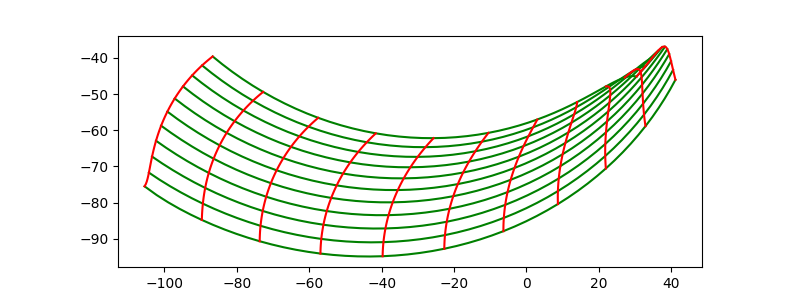

In [115]:

theta_A_range = [math.radians(126.7), math.radians(178.6)]
theta_D_range = [math.radians(-137.4), math.radians(-34.1)]

pts_per_line = 50
grid_spacing = 5

theta_A_grid = np.linspace(theta_A_range[0], theta_A_range[1], pts_per_line+1)
theta_D_grid = np.linspace(theta_D_range[0], theta_D_range[1], pts_per_line+1)

plt.figure(figsize=(8,3))
plt.gca().set_aspect('equal', adjustable='box')
for theta_A_n in theta_A_grid[::grid_spacing]:
    endpos = fk_vec(np.full(len(theta_D_grid), theta_A_n), theta_D_grid)
    plt.plot(endpos[0], endpos[1], 'g')
for theta_D_n in theta_D_grid[::grid_spacing]:
    endpos = fk_vec(theta_A_grid, np.full(len(theta_A_grid), theta_D_n))
    plt.plot(endpos[0], endpos[1], 'r')

In [129]:
theta_A_grid

array([2.21133216, 2.22944868, 2.2475652 , 2.26568172, 2.28379823,
       2.30191475, 2.32003127, 2.33814779, 2.3562643 , 2.37438082,
       2.39249734, 2.41061386, 2.42873037, 2.44684689, 2.46496341,
       2.48307993, 2.50119644, 2.51931296, 2.53742948, 2.555546  ,
       2.57366251, 2.59177903, 2.60989555, 2.62801207, 2.64612859,
       2.6642451 , 2.68236162, 2.70047814, 2.71859466, 2.73671117,
       2.75482769, 2.77294421, 2.79106073, 2.80917724, 2.82729376,
       2.84541028, 2.8635268 , 2.88164331, 2.89975983, 2.91787635,
       2.93599287, 2.95410939, 2.9722259 , 2.99034242, 3.00845894,
       3.02657546, 3.04469197, 3.06280849, 3.08092501, 3.09904153,
       3.11715804])

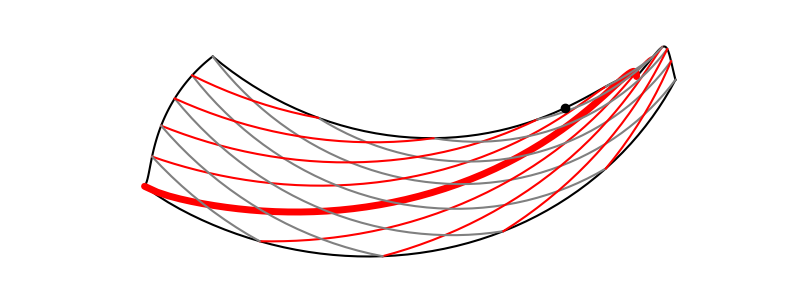

In [221]:
pts_per_line = 50
grid_spacing = 10

plt.figure(figsize=(8,3))
plt.gca().set_aspect('equal', adjustable='box')

#borders
endpos = fk_vec(np.full(len(theta_D_grid), theta_A_range[0]), theta_D_grid)
plt.plot(endpos[0], endpos[1], 'k')
endpos = fk_vec(np.full(len(theta_D_grid), theta_A_range[1]), theta_D_grid)
plt.plot(endpos[0], endpos[1], 'k')
endpos = fk_vec(theta_A_grid, np.full(len(theta_A_grid), theta_D_range[0]))
plt.plot(endpos[0], endpos[1], 'k')
endpos = fk_vec(theta_A_grid, np.full(len(theta_A_grid), theta_D_range[1]))
plt.plot(endpos[0], endpos[1], 'k')



endpos = fk_vec(theta_A_grid[::-1], theta_D_grid)


plt.plot(endpos[0], endpos[1], 'red', linewidth=5, solid_capstyle='round')
endpos = fk_vec(theta_A_grid, theta_D_grid)
plt.plot(endpos[0], endpos[1], 'gray')
for i in range(1, pts_per_line//grid_spacing):
    endpos = fk_vec(theta_A_grid[:-i*grid_spacing:][::-1], theta_D_grid[:-i*grid_spacing:])
    plt.plot(endpos[0], endpos[1], 'r')
    endpos = fk_vec(theta_A_grid[i*grid_spacing::][::-1], theta_D_grid[i*grid_spacing::])
    plt.plot(endpos[0], endpos[1], 'r')
    endpos = fk_vec(theta_A_grid[:-i*grid_spacing], theta_D_grid[i*grid_spacing:])
    plt.plot(endpos[0], endpos[1], 'gray')
    endpos = fk_vec(theta_A_grid[i*grid_spacing:], theta_D_grid[:-i*grid_spacing])
    plt.plot(endpos[0], endpos[1], 'gray')

theta_A_n = rad(126.737)
theta_D_n = rad(-68.581)
endpos = fk_vec(theta_A_n, theta_D_n)
plt.plot(endpos[0], endpos[1], 'ko')

plt.axis('off')
plt.savefig('plot.png', transparent=True, bbox_inches='tight', pad_inches=0)


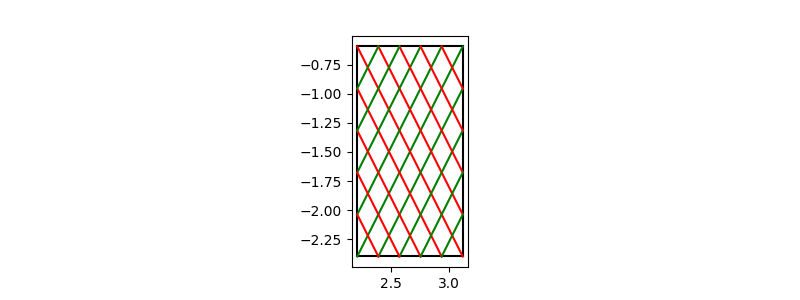

In [222]:
plt.figure(figsize=(8,3))
plt.gca().set_aspect('equal', adjustable='box')

plt.plot(np.full(len(theta_D_grid), theta_A_range[0]), theta_D_grid, 'k')
plt.plot(np.full(len(theta_D_grid), theta_A_range[1]), theta_D_grid, 'k')
plt.plot(theta_A_grid, np.full(len(theta_A_grid), theta_D_range[0]), 'k')
plt.plot(theta_A_grid, np.full(len(theta_A_grid), theta_D_range[1]), 'k')

endpos = (theta_A_grid, theta_D_grid)
plt.plot(endpos[0], endpos[1], 'g')
endpos = (theta_A_grid[::-1], theta_D_grid)
plt.plot(endpos[0], endpos[1], 'r')
for i in range(1, pts_per_line//grid_spacing):
    endpos = (theta_A_grid[:-i*grid_spacing], theta_D_grid[i*grid_spacing:])
    plt.plot(endpos[0], endpos[1], 'g')
    endpos = (theta_A_grid[i*grid_spacing:], theta_D_grid[:-i*grid_spacing])
    plt.plot(endpos[0], endpos[1], 'g')

    endpos = (theta_A_grid[:-i*grid_spacing:][::-1], theta_D_grid[:-i*grid_spacing:])
    plt.plot(endpos[0], endpos[1], 'r')

    endpos = (theta_A_grid[i*grid_spacing::][::-1], theta_D_grid[i*grid_spacing::])
    plt.plot(endpos[0], endpos[1], 'r')


In [139]:
plt.close('all')